In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('headbrain.csv')

In [3]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [5]:
mean_x = np.mean(X)
mean_y = np.mean(y)

In [6]:
numer = 0
denom = 0
n = len(X)

for i in range(n):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
slope = numer/denom

In [7]:
slope

0.26342933948939945

In [8]:
intercept = mean_y - slope * mean_x

In [9]:
intercept

325.57342104944223

In [10]:
from scipy.stats import linregress

In [11]:
linregress(X,y)

LinregressResult(slope=0.2634293394893994, intercept=325.57342104944235, rvalue=0.7995697092542962, pvalue=5.957630839406541e-54, stderr=0.012907433440886988)

In [12]:
predictions = []
for i in range(n):
    y_pred = slope * X[i] + intercept
    predictions.append(int(y_pred))

In [13]:
predictions[:10]

[1514, 1310, 1448, 1320, 1425, 1269, 1322, 1263, 1277, 1374]

In [14]:
y[:10]

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375],
      dtype=int64)

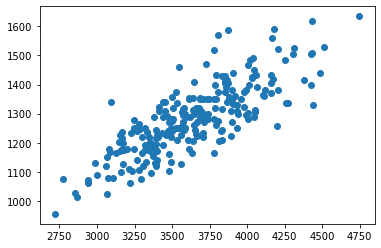

In [15]:
plt.scatter(X,y)
plt.show()

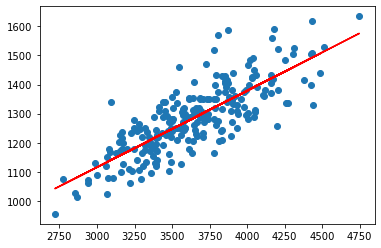

In [16]:
plt.scatter(X,y)
plt.plot(X,predictions,'r')
plt.show()

In [17]:
error = 0
for i in range(n):
    error += (predictions[i] - y[i]) ** 2

mse = error/n

In [18]:
mse

5202.9029535864975

In [19]:
np.sqrt(mse)

72.13115106239812

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
st = StandardScaler()
scaled_x = st.fit_transform(X.reshape(-1,1))
scaled_y = st.fit_transform(y.reshape(-1,1))

In [39]:
def cost_function(x,y,m,c):
    predictions = []
    for i in range(n):
        y_pred = m * x[i] + c
        predictions.append(y_pred)
    error = 0
    for i in range(n):
        error += (predictions[i] - y[i]) ** 2
    mse = error/n
    return mse[0][0]

In [40]:
def gradient(x,y,alpha,epochs):
    slope = 0
    inter = 0
    cost_history = [0] * epochs
    for i in range(epochs):
        y_pred = slope * x + inter
        loss = y_pred - y
        grad_m = (2/n) * loss.T.dot(x)
        grad_c = (2/n) * np.sum(loss)
        slope = slope - grad_m * alpha
        inter = inter - grad_c * alpha
        cost_history[i] = cost_function(x,y,slope,inter)
    return cost_history, slope, inter-

In [62]:
epochs = 200
alpha = 0.01
cost, slope, inter = gradient(scaled_x, scaled_y, alpha, epochs)

In [68]:
slope

array([[0.78550692]])

In [63]:
cost[-1]

0.3608860420874126

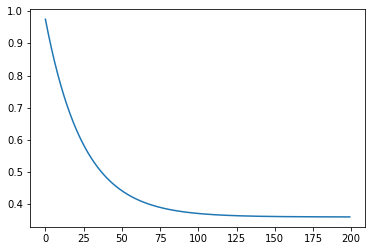

In [64]:
x_axis = [i for i in range(epochs)]
plt.plot(x_axis,cost)
plt.show()

In [66]:
predictions = []
for i in range(n):
    y_pred = slope[0] * scaled_x[i] + inter
    predictions.append(y_pred)

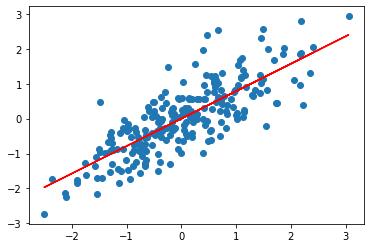

In [67]:
plt.scatter(scaled_x,scaled_y)
plt.plot(scaled_x,predictions,'r')
plt.show()